# CCE2503 Search and Optimisation
## Assignment
### Year 2024-2025 - Semester II

* Developed by: Adrian Muscat, 2023
* Minor edits: Johann A. Briffa, 2025

---

### Write your name, ID Card Number and class below.

* Name: Lenise Silvio
* Class: B.Sc. Computing Science 3rd Year

---

## Instructions:

In this assignment you will be looking for a minimiser for the 2D Griewangk
function using the following methods. 

1. Standard Gradient descent
2. Random search
3. Random Search + Gradient descent
4. Simulated annealing

You will also draw convergence plots and compare the methods with each other.

You may be using some of the functions you had developed during the preparatory
stage, e.g. standard gradient descent and python boilerplate code for plotting
contour surfaces, 3D wireframes, timing code, counting function calls etc. 

## Notes: 

1. With the exception of Gradient Descent, for which you shall modify the one in
   the preparatory exercises notebook, program all optimisation algorithms from
   scratch.

2. You can only make use of the python packages included in the notebook in its
   original form, i.e. ('matplotlib.pyplot', 'mpl_toolkits.mplot3d', 'numpy' and
   'time')

3. Cite any blogs, code repositories and/or generative AI tools (e.g. ChatGPT)
   used in completing this assignment. In the case of generative AI tools,
   explain how these tools were used.

4. This work is to be attempted individually. It is essential that the work you
   eventually submit and present for your assignment consists only of your own
   work; use of copied material will be treated as plagiarism. Discussion is
   only permitted on general issues, and it is absolutely forbidden to discuss
   specific details with anyone and/or share results.

5. Please sign the plagiarism form that can be found here:
   https://www.um.edu.mt/ict/students/formsguidelines/

6. Your submission consists of two components:
   * The python notebook, with all cells executed.
   * The signed plagiarism form.

---

## Preparation:

In [1]:
# We first load the required modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import time
%matplotlib inline

The Griewangk function is:

$G(\mathbf{x}) = 1 + \frac{1}{4000}x_1^2 + \frac{1}{4000}x_2^2 - 
cos(x_1)cos(\frac{\sqrt(2)}{2}x_2)$

In [2]:
# Define objective function to minimize
def Griewangk(x, a=1, b=5):
    """
    Rosenbrock's function is a 2D uni-modal function
    This implementation follows the definition in Kochenderfer & Wheeler, 2019
    x : x is a numpy array of dimensions [2,m], where m is the number of 2D points
    """
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))

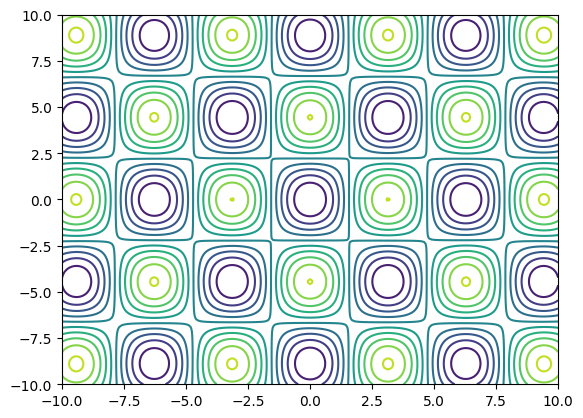

In [3]:
# Plot contour plot in the search space (xmin=-10, ymin=-10), (xmin=10, ymin=10)
N=201
limit=10
xx = np.linspace(-limit, limit, N)
yy = np.linspace(-limit, limit, N)
X = np.repeat(xx,N).reshape(N,N)
Y = np.tile(yy,N).reshape(N,N)
#
x = np.column_stack((X.flatten(),Y.flatten())).T
Z = Griewangk(x).reshape(N,N)
#
plt.contour(X,Y,Z, levels=10)

In [4]:
# Find the location of the minimum value in Z
print(Z.shape)
idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print(idx, '(',X[idx], ', ', Y[idx],')', Z[idx])
print('Therefore global minimum is at (0.0, 0.0)')

(201, 201)
(100, 100) ( 0.0 ,  0.0 ) 0.0
Therefore global minimum is at (0.0, 0.0)


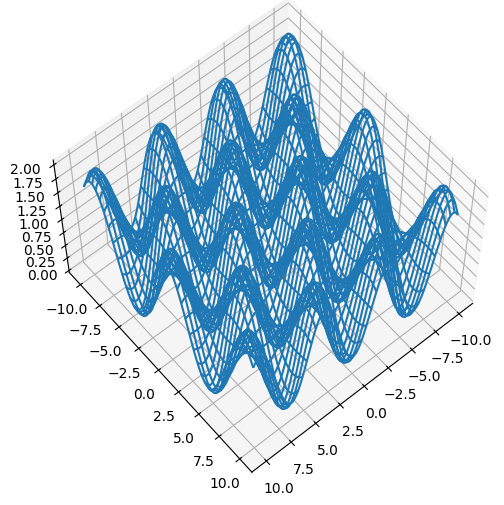

In [5]:
# Plot a 3D wireframe of the objective function
#
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, cmap=cm.jet)
#ax.plot_wireframe(X, Y, np.log(Z), rstride=2, cstride=2)
#ax.view_init(0, 90) # elevation, azimuth
ax.view_init(60, 50) # elevation, azimuth


---
## Q1

Modify the gradient descent algorithm with the derivate of the $G(\mathbf{x})$ and starting from a random position in the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$, find a minimiser of $G(\mathbf{x})$. 

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

**Calculating the Gradient**

In [6]:
def grad_Griewangk(x):
    # Calculate the gradient of the Griewangk function
    grad_x = x[0]/2000 + np.sin(x[0])*np.cos(0.5*x[1]*np.sqrt(2))
    grad_y = x[1]/2000 + np.cos(x[0])*np.sin(0.5*x[1]*np.sqrt(2))*0.5*np.sqrt(2)
    return np.array([grad_x, grad_y])

**Gradient Descent Algorithm**

In [7]:
def gradient_descent(x_init, alpha=0.1, max_iter=100, tol=1e-6):

    x = x_init.copy()
    x_history = np.zeros((max_iter+1, 2))
    f_history = np.zeros(max_iter+1)
    
    # Store initial position and value
    x_history[0] = x
    f_history[0] = Griewangk(x)
    
    for i in range(max_iter):
        # Calculate gradient
        gradient = grad_Griewangk(x)
        
        # Update position
        x = x - alpha * gradient
        
        # Store current position and value
        x_history[i+1] = x
        f_history[i+1] = Griewangk(x)
        
        # Check convergence
        if np.linalg.norm(gradient) < tol:
            # Trim history arrays to actual iterations used
            x_history = x_history[:i+2]
            f_history = f_history[:i+2]
            break
            
    return x_history, f_history

**Executing the Algorithm for 100 Iterations**

In [8]:
# Set parameters
n_runs = 100
max_iter = 100
alpha = 0.1
limit = 10  # Search space limits

# Arrays to store results
all_f_histories_grad_descent = []
final_values_grad_descent = []

# Run gradient descent 100 times
for run in range(n_runs):
    # Random initial position within the search space
    x_init = np.random.uniform(-limit, limit, 2)
    
    # Run gradient descent
    _, f_history_grad_descent = gradient_descent(x_init, alpha=alpha, max_iter=max_iter)
    
    # Store results
    all_f_histories_grad_descent.append(f_history_grad_descent)
    final_values_grad_descent.append(f_history_grad_descent[-1])

**Plotting Convergence and Standard Deviation**

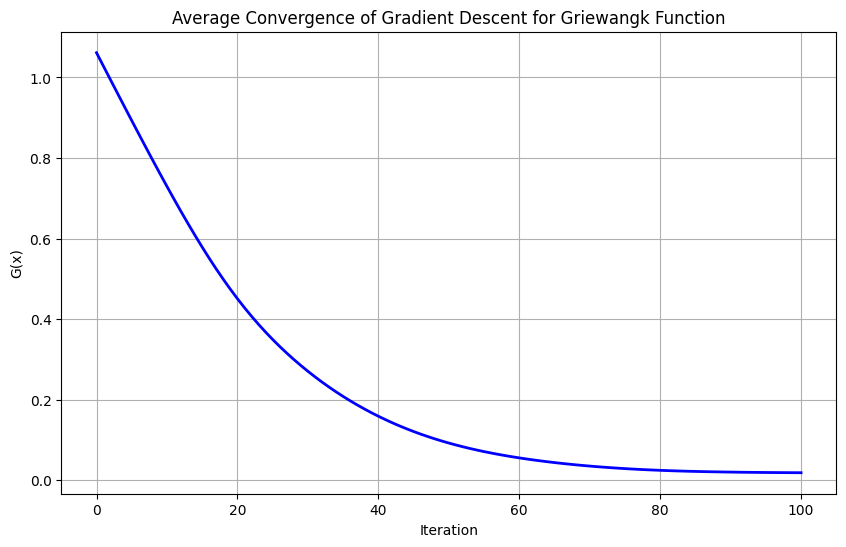

Mean final value: 0.018545
Standard deviation of final values: 0.012389


In [9]:
# Calculate statistics
max_length = max(len(hist) for hist in all_f_histories_grad_descent)
padded_histories = []

# Pad shorter histories with their final values
for hist in all_f_histories_grad_descent:
    padded = np.zeros(max_length)
    padded[:len(hist)] = hist
    if len(hist) < max_length:
        padded[len(hist):] = hist[-1]
    padded_histories.append(padded)

# Convert to numpy array for calculations
f_histories_grad_descent = np.array(padded_histories)

# Calculate mean and standard deviation
mean_f_history_grad_descent = np.mean(f_histories_grad_descent, axis=0)
std_final_grad_descent = np.std(final_values_grad_descent)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history_grad_descent, 'b-', linewidth=2)
plt.title('Average Convergence of Gradient Descent for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values_grad_descent):.6f}")
print(f"Standard deviation of final values: {std_final_grad_descent:.6f}")

---

## Q2

Implement a random search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

**Implementing Random Search Algorithm**

In [10]:
def random_search(max_iter=100, limit=10):

    # Initialize best position and value
    x_best = np.random.uniform(-limit, limit, 2)
    f_best = Griewangk(x_best)
    
    # Initialize history arrays
    f_history = np.zeros(max_iter + 1)
    f_history[0] = f_best
    
    for i in range(max_iter):
        # Generate a random point in the search space
        x_candidate = np.random.uniform(-limit, limit, 2)
        f_candidate = Griewangk(x_candidate)
        
        # Update if better point is found
        if f_candidate < f_best:
            x_best = x_candidate.copy()
            f_best = f_candidate
        
        # Store current best value
        f_history[i + 1] = f_best
    
    return x_best, f_history

**Executing the Algorithm for 100 Iterations**

In [ ]:
# Set parameters
n_runs = 100
max_iter = 100
limit = 10  # Search space limits

# Arrays to store results
all_f_histories_ran_search = []
final_values_ran_search = []

# Run random search 100 times
for run in range(n_runs):
    # Run random search
    _, f_history_ran_search = random_search(max_iter=max_iter, limit=limit)
    
    # Store results
    all_f_histories_ran_search.append(f_history_ran_search)
    final_values_ran_search.append(f_history_ran_search[-1])

**Plotting Convergence and Standard Deviation**

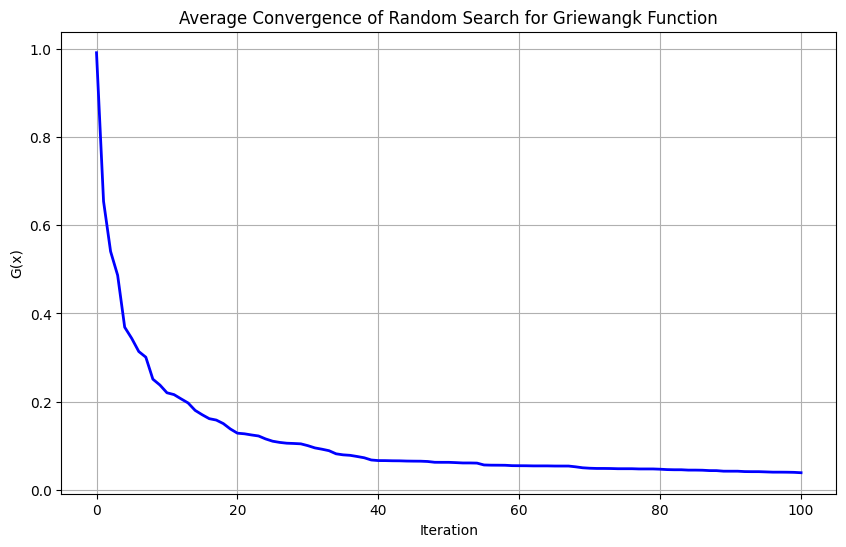

Mean final value: 0.038985
Standard deviation of final values: 0.024837


In [12]:
# Calculate statistics
f_histories_array_ran_search = np.array(all_f_histories_ran_search)
mean_f_history_ran_search = np.mean(f_histories_array_ran_search, axis=0)
std_final_ran_search = np.std(final_values_ran_search)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history_ran_search, 'b-', linewidth=2)
plt.title('Average Convergence of Random Search for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values_ran_search):.6f}")
print(f"Standard deviation of final values: {std_final_ran_search:.6f}")

---

## Q3

Implement a two step approach:

1. In the first step carry out a random search and find minimiser $\mathbf{x}_{initial}^*$, within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.
2. In the second step use gradient descent and starting from $\mathbf{x}_{initial}^*$ find minimiser $\mathbf{x}_{final}^*$  within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [10 marks]



**Executing the Algorithm for 100 Iterations**

In [13]:
num_runs = 100
num_iterations = 100
learning_rate = 0.1
limit = 10

# Initialize an array to store function values for all runs
all_f_histories_hybrid = np.zeros((num_runs, num_iterations+1))  
final_values_hybrid = []

for run in range(num_runs):
    # Step 1: Random Search to get initial point
    x_best, _ = random_search(max_iter=100, limit=limit)
    
    # Step 2: Gradient Descent from x_initial
    _, f_history_hybrid = gradient_descent(x_best, alpha=learning_rate, max_iter=num_iterations)
    
    # Store final value
    final_values_hybrid.append(f_history_hybrid[-1])
    
    # Fill the history array
    len_history = min(len(f_history_hybrid), num_iterations+1)
    all_f_histories_hybrid[run, :len_history] = f_history_hybrid[:len_history]
    
    # If gradient descent converged early, fill the rest with the final value
    if len_history < num_iterations+1:
        all_f_histories_hybrid[run, len_history:] = f_history_hybrid[-1]


**Plotting Convergence and Standard Deviation**

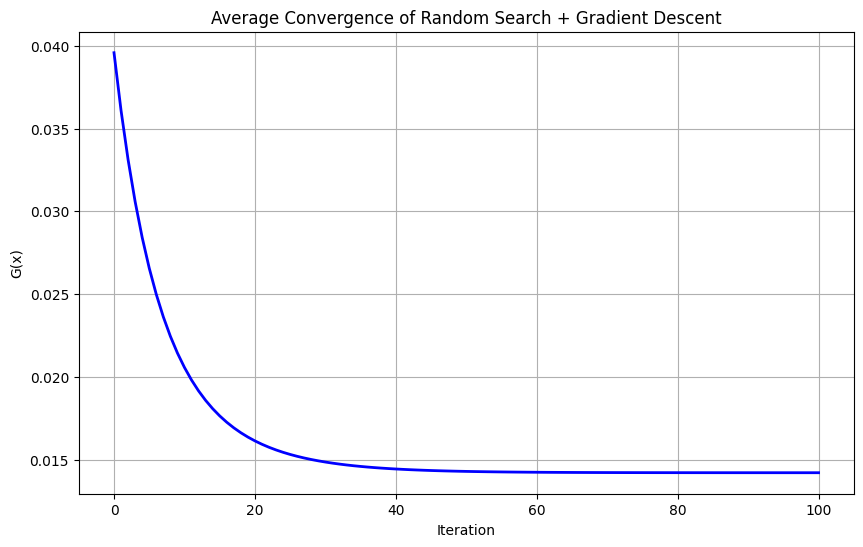

Mean final value: 0.014227
Standard deviation of final values: 0.009568


In [14]:
# Calculate mean and standard deviation
mean_f_values_hybrid = np.mean(all_f_histories_hybrid, axis=0)
std_final_hybrid = np.std(all_f_histories_hybrid[:, -1])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_values_hybrid, 'b-', linewidth=2)
plt.title('Average Convergence of Random Search + Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(all_f_histories_hybrid[:, -1]):.6f}")
print(f"Standard deviation of final values: {std_final_hybrid:.6f}")

---

## Q4 

Implement a simulated annealing search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [30 marks]

**Implementing Simulated Annealing Algorithm**

In [ ]:
def simulated_annealing(max_iter=100, limit=10, T_initial=10.0, T_final=0.1):

    # Initialize current position and value
    x_current = np.random.uniform(-limit, limit, 2)
    f_current = Griewangk(x_current)
    
    # Initialize best position and value
    x_best = x_current.copy()
    f_best = f_current
    
    # Initialize history arrays
    f_history = np.zeros(max_iter + 1)
    f_history[0] = f_best
    
    # Calculate cooling rate
    cooling_rate = (T_final / T_initial) ** (1.0 / max_iter)
    
    # Set current temperature
    T = T_initial
    
    for i in range(max_iter):
        # Generate a neighbouring solution
        # The step size decreases with temperature
        step_size = 0.5 * T / T_initial * limit
        neighbor = x_current + np.random.uniform(-step_size, step_size, 2)
        
        # Ensure neighbour is within the search space
        neighbor = np.clip(neighbor, -limit, limit)
        
        # Calculate objective function value for neighbour
        f_neighbor = Griewangk(neighbor)
        
        # Calculate energy difference
        delta_E = f_neighbor - f_current
        
        # Accept the new solution if it's better or with a probability if it's worse
        if delta_E < 0 or np.random.random() < np.exp(-delta_E / T):
            x_current = neighbor.copy()
            f_current = f_neighbor
            
            # Update best solution 
            if f_current < f_best:
                x_best = x_current.copy()
                f_best = f_current
        
        # Store current best value
        f_history[i + 1] = f_best
        
        # Decrease temperature
        T *= cooling_rate
    
    return x_best, f_history

**Executing the Algorithm for 100 Iterations**

In [16]:
# Set parameters
n_runs = 100
max_iter = 100
limit = 10
T_initial = 1.0
T_final = 0.01

# Arrays to store results
all_f_histories_sim_annealing = []
final_values_sim_annealing = []

# Run simulated annealing 100 times
for run in range(n_runs):
    # Run simulated annealing
    _, f_history_sim_annealing = simulated_annealing(
        max_iter=max_iter, 
        limit=limit,
        T_initial=T_initial, 
        T_final=T_final
    )
    
    # Store results
    all_f_histories_sim_annealing.append(f_history_sim_annealing)
    final_values_sim_annealing.append(f_history_sim_annealing[-1])

**Plotting Convergence and Standard Deviation**

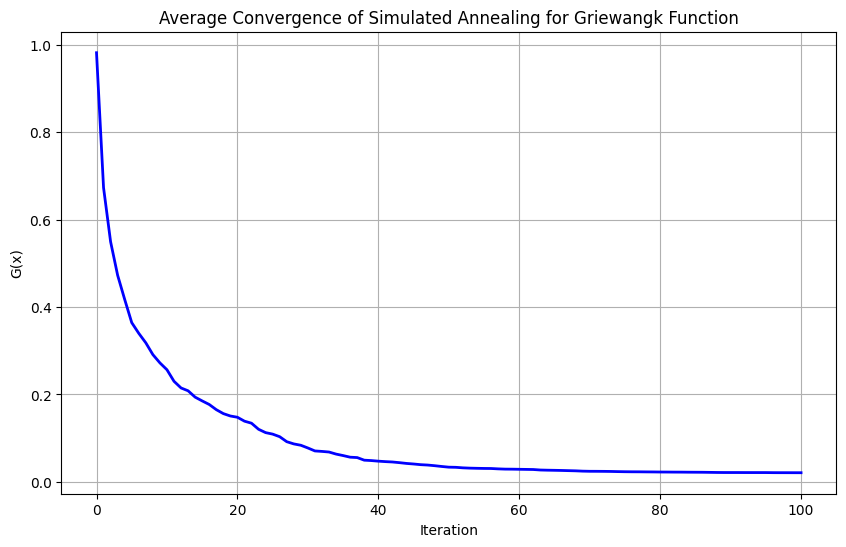

Mean final value: 0.020829
Standard deviation of final values: 0.013485


In [17]:
# Calculate statistics
f_histories_array_sim_annealing = np.array(all_f_histories_sim_annealing)
mean_f_history_sim_annealing = np.mean(f_histories_array_sim_annealing, axis=0)
std_final_sim_annealing = np.std(final_values_sim_annealing)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(mean_f_history_sim_annealing, 'b-', linewidth=2)
plt.title('Average Convergence of Simulated Annealing for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final value: {np.mean(final_values_sim_annealing):.6f}")
print(f"Standard deviation of final values: {std_final_sim_annealing:.6f}")

---

## Q5

Superimpose all plots from all four optimisation methods and compare the algorithms in terms of rate of convergence, effectiveness and robustness.

### [30 marks]

**Superimposing All Plots**

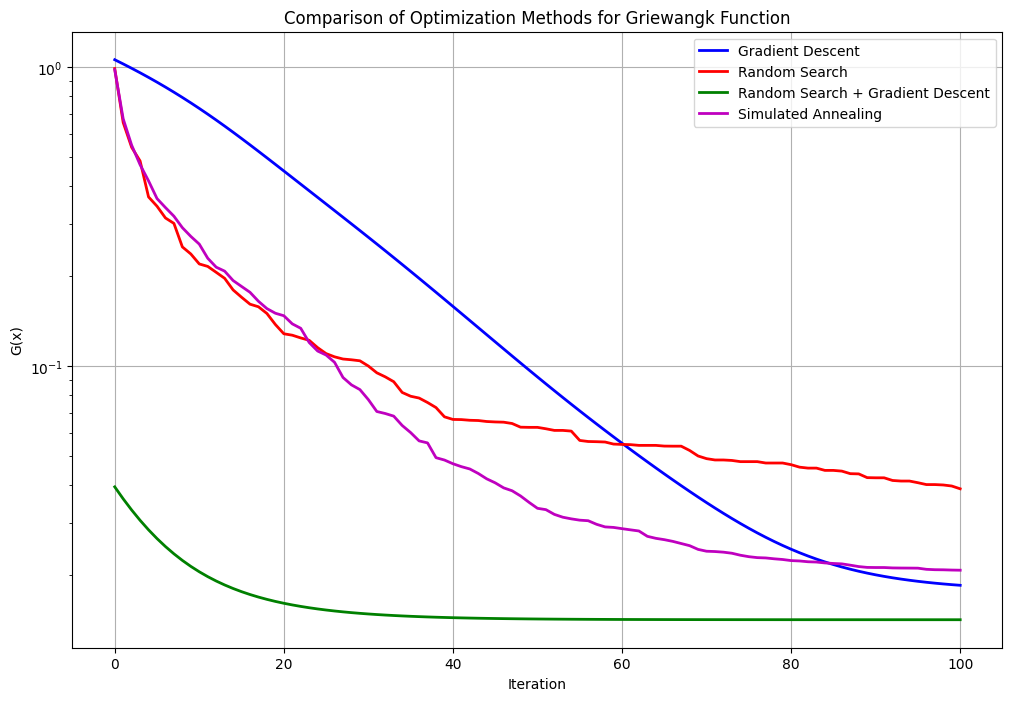


Comparison of Optimization Methods:
Method                    Mean Final Value     Standard Deviation  
Gradient Descent          0.018545             0.012389            
Random Search             0.038985             0.024837            
Random Search + GD        0.014227             0.009568            
Simulated Annealing       0.020829             0.013485            


In [ ]:
# Superimposing plots
plt.figure(figsize=(12, 8))

plt.plot(mean_f_history_grad_descent, 'b-', linewidth=2, label='Gradient Descent')
plt.plot(mean_f_history_ran_search, 'r-', linewidth=2, label='Random Search')
plt.plot(mean_f_values_hybrid, 'g-', linewidth=2, label='Random Search + Gradient Descent')
plt.plot(mean_f_history_sim_annealing, 'm-', linewidth=2, label='Simulated Annealing')

plt.title('Comparison of Optimization Methods for Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Compare all final results
final_results = {
    'Method': ['Gradient Descent', 'Random Search', 'Random Search + GD', 'Simulated Annealing'],
    'Mean Final Value': [
        np.mean(final_values_grad_descent), 
        np.mean(final_values_ran_search), 
        np.mean(all_f_histories_hybrid[:, -1]),
        np.mean(final_values_sim_annealing)
    ],
    'Standard Deviation': [
        std_final_grad_descent,
        std_final_ran_search,
        std_final_hybrid,
        std_final_sim_annealing
    ]
}

# Print Statistics
print("\nComparison of Optimization Methods:")
print(f"{'Method':<25} {'Mean Final Value':<20} {'Standard Deviation':<20}")
for i in range(len(final_results['Method'])):
    print(f"{final_results['Method'][i]:<25} {final_results['Mean Final Value'][i]:<20.6f} {final_results['Standard Deviation'][i]:<20.6f}")


**Comparing Rate of Convergence**

The random search and gradient descent combined algorithm had the fastest convergence, likely due to the initial random search providing a starting point for the gradient descent algorithm that was in the region of the global minimum. Random search and simulated annealing had similar convergence rates, and they were slower than the combined algorithm but better than gradient descent alone. The randomness in both of the algorithms helps ensure that search space is explored quickly. The gradient descent algorithm alone had the slowest convergence, which is expected since the learning rate is small and hence takes one small step at a time towards the minimum and due to getting stuck in local minima.

**Comparing Effectiveness**

The most effective algorithm was the random search and gradient descent combined algorithm, which got the closest to the global minimum. The initial random search provided a good starting point for the gradient descent algorithm, which was able to refine the solution further. The combined approach helps ensure that the limitations of each of the algorithms is counteracted by the other one. The gradient descent algorithm was the second most effective. Gradient descent systematically moves towards the minimum, allowing it to find a close solution. The gradient descent was closely followed by the simulated annealing algorithm. The decreasing temperature in the simulated annealing algorithm helps ensure that the search space is explored quickly at the start, and then refined as the temperature decreases. The random search algorithm was the least effective, likely due to the fact that it moves randomly in the search space and has no mechanism to refine the solution.

**Comparing Robustness**

The combined random search and gradient descent algorithm was the most robust, as it had the lowest standard deviation. This is likely due to the initial random search providing a good starting point, and therefore it prevents the gradient descent algorithm from getting stuck in local minima and reduces its dependency on the starting point. Gradient descent and simulated annealing had similar moderate robustness, with the gradient descent algorithm being slightly more robust. While gradient descent is able to move towards the minimum, but it is sensitive to the starting point and can get stuck in local minima. Simulated annealing slowly decreases the temperature, allowing the randomness to be reduced over time, which helps ensure more consistent results. However, the randomness in the algorithm can still affect the robustness of the results. Random search was the least robust, as it had the highest standard deviation. This is likely due to it being completely random and having no mechanism to refine the solution.

**References**

* AI tools were used to help clarify concepts, calculating the derivative for the gradient descent, debug issues and aided in the generation of the code for the plots.

* Algorithms for Optimization, Mykel J. Kochenderfer and Tim A. Wheeler, https://algorithmsbook.com/optimization/#

* https://gist.github.com/jdherman/6e7b9d588c57380bc3e7

* https://www.machinelearningplus.com/machine-learning/simulated-annealing-algorithm-explained-from-scratch-python/

* https://github.com/perrygeo/simanneal